Credit of all the functions written in spotfuncs.py goes to Alice Harpole

http://harpolea.github.io/2018-05-09-spotipy

## Make playlist csv's from Spotify

In [6]:
import spotipy
spotify = spotipy.Spotify()
import sys
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import lxml
import spotfuncs 
%matplotlib inline

### Step 1

Make a file called __credentials.txt__ in some other folder (not spotify folder)

with format...

------------------

client_id ########
<br>
client_secret #######

-----------------

### Step 2

Enter filepath to __credentials.txt__


In [2]:
filepath = "C:/Users/epmmo/Documents/Spec/credentials.txt"

### Step 3 

Enter name of playlists you want to scrape:

Ex: `["RapCaviar","United States Top 50"]`

In [3]:
playlists = ["mint"]

### Step 4

Run the next cell and find the csv files in the spotify directory

In [4]:
for i in playlists:
    df = spotfuncs.get_spotify_playlist_data(playlist=i, credentials_file=filepath)
    df.to_csv("{0}.csv".format(i.replace(" ","_")))

In [17]:
df.columns

Index(['album', 'artists', 'duration_ms', 'episode', 'explicit', 'href', 'id',
       'is_local', 'name', 'popularity', 'preview_url', 'track',
       'track_number', 'type', 'uri', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'valence'],
      dtype='object')

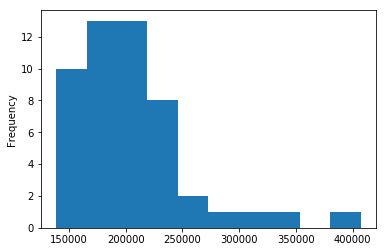

In [7]:
df.duration_ms.plot.hist()